In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ebay-sales/Onyx Data -DataDNA Dataset Challenge - eBay Used Car Sales -March 2024.xlsx


In [2]:
import pandas as pd
import numpy as np

In [3]:
#reading in the data 
df = pd.read_excel('/kaggle/input/ebay-sales/Onyx Data -DataDNA Dataset Challenge - eBay Used Car Sales -March 2024.xlsx')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,Lattitude,Longitude,lastSeen
0,2016-03-19 16:52:13,Volkswagen_Golf_1.4_Special,privat,Angebot,2600,test,limousine,2003,manuell,75,...,4,benzin,volkswagen,nein,2016-03-19,0,52224,50.76670,6.23333,2016-03-19 16:52:13
1,2016-03-18 14:38:13,Volkswagen_Golf_1.4_Special_TÜV_Klimaautomatik_VW,privat,Angebot,2300,test,limousine,2003,manuell,75,...,4,benzin,volkswagen,nein,2016-03-18,0,48369,52.17520,7.63132,2016-03-21 07:16:28
2,2016-03-21 18:58:48,Volkswagen_Golf_1.4_Ocean,privat,Angebot,2750,test,limousine,2003,manuell,75,...,9,benzin,volkswagen,nein,2016-03-21,0,58730,51.47450,7.76699,2016-04-06 21:16:58
3,2016-03-23 23:52:06,"Volkswagen_Golf_1.4_Ocean_Klima""2.Hand""VW_Sche...",privat,Angebot,2850,control,limousine,2003,manuell,75,...,10,benzin,volkswagen,nein,2016-03-23,0,47137,51.43511,6.76301,2016-04-06 19:15:47
4,2016-04-05 10:49:28,Volkswagen_Golf_1.4_Ocean,privat,Angebot,2700,control,limousine,2003,manuell,75,...,8,benzin,volkswagen,nein,2016-04-05,0,15754,52.28128,13.79809,2016-04-07 14:56:07


In [4]:
#gaining more data insight
df.describe()

,dateCrawled,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,dateCreated,nrOfPictures,postalCode,Lattitude,Longitude,lastSeen
count,371404,3.714040e+05,371404.000000,371404.000000,371404.000000,371404.000000,371404,371404.0,371404.000000,371404.000000,371404.000000,371404
mean,2016-03-21 13:30:57.545963264,1.730085e+04,2004.578788,115.539528,125618.962101,5.734330,2016-03-20 19:43:41.477420800,0.0,50824.836728,50.897614,9.446463,2016-03-30 03:38:10.102618368
min,2016-03-05 14:06:22,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,2014-03-10 00:00:00,0.0,1067.000000,44.710200,-1.503300,2016-03-05 14:15:08
25%,2016-03-13 12:51:52,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,2016-03-13 00:00:00,0.0,30459.000000,49.481100,7.733330,2016-03-23 11:32:10.500000
50%,2016-03-21 18:36:30,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,2016-03-21 00:00:00,0.0,49610.000000,51.050000,9.055000,2016-04-03 23:17:33
75%,2016-03-29 14:49:28.249999872,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,2016-03-29 00:00:00,0.0,71549.000000,52.203580,10.885077,2016-04-06 10:45:03
max,2016-04-07 14:36:58,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,2016-04-07 00:00:00,0.0,99998.000000,55.018663,14.970560,2016-04-07 14:58:51
std,NaN,3.588553e+06,92.881853,191.786025,40111.605815,3.712461,NaN,0.0,25799.258996,1.706477,2.076794,NaN


<Axes: >

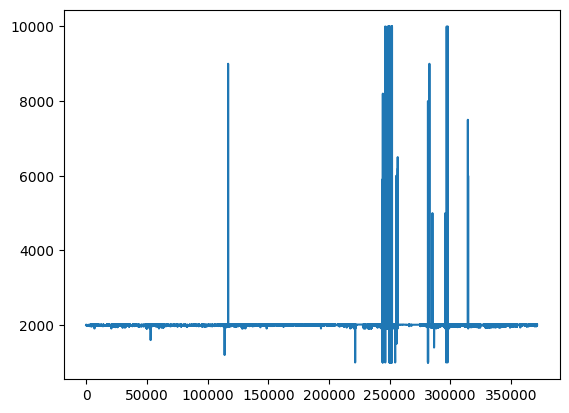

In [5]:
#determining registration year incosistencies
df['yearOfRegistration'].plot()

In [6]:
df['yearOfRegistration'].value_counts(ascending=True).head(15)

yearOfRegistration
1911    1
4100    1
1255    1
3800    1
1919    1
7777    1
5600    1
1602    1
8500    1
5900    1
2200    1
7100    1
1925    1
1915    1
4800    1
Name: count, dtype: int64

In [7]:
#identyfying rows with year error input
sus1 = df.loc[df['yearOfRegistration'] > 2023]
sus1[['yearOfRegistration']].sort_values('yearOfRegistration',axis=0,ascending=True).value_counts()



yearOfRegistration
9999                  27
5000                  18
3000                   7
6000                   6
9000                   5
2500                   4
7000                   4
4000                   3
8888                   2
7500                   2
2800                   2
2222                   2
4500                   2
5911                   2
8000                   2
5555                   2
9229                   1
7800                   1
7777                   1
9996                   1
9450                   1
8200                   1
8455                   1
8500                   1
7100                   1
2066                   1
6500                   1
6200                   1
2200                   1
5600                   1
5300                   1
4800                   1
4100                   1
3800                   1
3700                   1
3500                   1
3200                   1
2900                   1
2290                   1
5900  

In [8]:
#removing rows with  <2023 year errors, examining <1900 years

#removing <2023 data 
df1 = df[~(df['yearOfRegistration'] > 2023)]

#removing >1900 data 
df1 = df1[~(df1['yearOfRegistration'] < 1900)]
df1['yearOfRegistration'].value_counts(ascending=True).head(15)

yearOfRegistration
1920    1
1919    1
1925    1
1915    1
1911    1
1946    2
1928    2
1940    2
1927    2
1944    2
1923    3
1942    3
1949    3
1941    4
1931    4
Name: count, dtype: int64

In [9]:
df2 = df1[['brand','yearOfRegistration']]

df3 = (df2.groupby(['yearOfRegistration'])['brand']
       .apply(lambda x: x.value_counts().index[0])
      .reset_index()
      )

df3['brand'].head(30)




0     sonstige_autos
1     sonstige_autos
2     sonstige_autos
3               ford
4     sonstige_autos
5            citroen
6     sonstige_autos
7               ford
8               ford
9                bmw
10              ford
11              ford
12              ford
13    sonstige_autos
14     mercedes_benz
15              opel
16              fiat
17    sonstige_autos
18    sonstige_autos
19    sonstige_autos
20              ford
21              jeep
22              jeep
23        volkswagen
24    sonstige_autos
25        volkswagen
26    sonstige_autos
27    sonstige_autos
28    sonstige_autos
29          chrysler
Name: brand, dtype: object

In [10]:
df3['yearOfRegistration']
df3['Sales_volume'] = df2.groupby(['yearOfRegistration'])['brand']